In [ ]:
!pip install pyforest
from pyforest import *
import datetime, pickle, copy
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use('fivethirtyeight')
import math
from scipy import stats
from google.colab import files
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn import metrics
from time import time
from sklearn.model_selection import cross_val_score
!pip install catboost
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install ngboost
from sklearn.linear_model import LinearRegression
from ngboost import NGBRegressor
from ngboost.learners import default_tree_learner
from ngboost.distns import Normal
from ngboost.scores import MLE

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dispense_sbi.csv to dispense_sbi (1).csv


In [ ]:
# Import data
df = pd.read_csv("dispense_sbi.csv")
df

<IPython.core.display.Javascript object>

,ATM_NAME,Weekday,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,SBI,FRIDAY,W,WWH,1,1,2021,1.000000e+06,1355000
1,SBI,SATURDAY,H,WHH,2,1,2021,1.000000e+06,211500
2,SBI,SUNDAY,H,HHW,3,1,2021,1.000000e+06,1513000
3,SBI,MONDAY,W,HWW,4,1,2021,4.399280e+05,986000
4,SBI,TUESDAY,W,WWW,5,1,2021,4.399280e+05,0
5,SBI,WEDNESDAY,W,WWW,6,1,2021,4.399280e+05,0
6,SBI,THURSDAY,W,WWW,7,1,2021,4.399280e+05,0
7,SBI,FRIDAY,W,WWH,8,1,2021,4.399280e+05,0
8,SBI,SATURDAY,H,WHH,9,1,2021,4.399280e+05,715000
9,SBI,SUNDAY,H,HHW,10,1,2021,4.399280e+05,894500


In [ ]:
df['date'] = pd.to_datetime(dict(year=df.trans_year, month=df.trans_month, day=df.trans_date_set))
df.tail()

<IPython.core.display.Javascript object>

,ATM_NAME,Weekday,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn,date
380,SBI,SUNDAY,H,HHW,16,1,2021,510928.5714,528500,2021-01-16
381,SBI,MONDAY,W,HWW,17,1,2021,617428.5714,391500,2021-01-17
382,SBI,TUESDAY,W,WWW,18,1,2021,617428.5714,505500,2021-01-18
383,SBI,WEDNESDAY,W,WWW,19,1,2021,617428.5714,671000,2021-01-19
384,SBI,THURSDAY,W,WWW,20,1,2021,617428.5714,777500,2021-01-20


In [ ]:
data = df.set_index('date')
data.head()

,ATM_NAME,Weekday,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
date,,,,,,,,,
2021-01-01,SBI,FRIDAY,W,WWH,1,1,2021,1000000.0,1355000
2021-01-02,SBI,SATURDAY,H,WHH,2,1,2021,1000000.0,211500
2021-01-03,SBI,SUNDAY,H,HHW,3,1,2021,1000000.0,1513000
2021-01-04,SBI,MONDAY,W,HWW,4,1,2021,439928.0,986000
2021-01-05,SBI,TUESDAY,W,WWW,5,1,2021,439928.0,0


In [ ]:
data[['total_amount_withdrawn']][2017:]

,total_amount_withdrawn
date,


In [ ]:
data['total_amount_withdrawn'] [2011:]

Series([], Name: total_amount_withdrawn, dtype: int64)

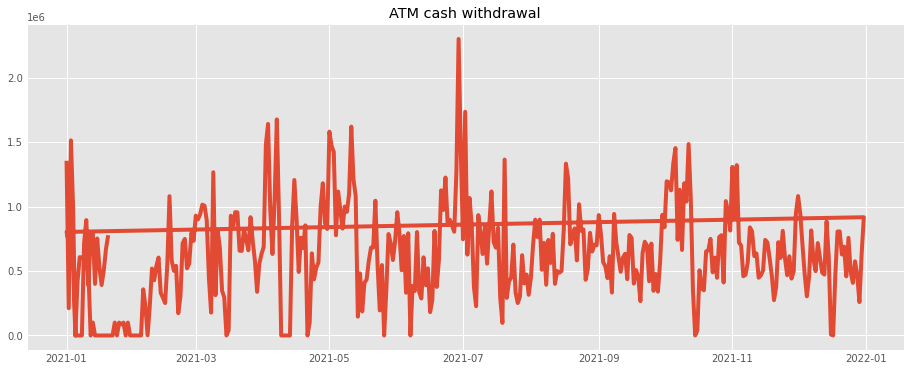

In [ ]:
plt.figure(figsize=(14,6))
plt.style.use('ggplot')
plt.plot(data['total_amount_withdrawn'])
plt.title('ATM cash withdrawal')
plt.show()

In [ ]:
#data = data.drop('Unnamed: 0', axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 385 entries, 2021-01-01 to 2021-01-20
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ATM_NAME                385 non-null    object 
 1   Weekday                 385 non-null    object 
 2   working_day             385 non-null    object 
 3   holiday_sequence        385 non-null    object 
 4   trans_date_set          385 non-null    int64  
 5   trans_month             385 non-null    int64  
 6   trans_year              385 non-null    int64  
 7   prevweek_mean           385 non-null    float64
 8   total_amount_withdrawn  385 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 30.1+ KB


# Target analysis
Target distribution is skewed and can be seen in the plots below - this is generally not a good thing. So we will need to adjust it so its normally distributed. This can be achieved with a log transform or something more powerful like box cox. On the diagram below, the left pane shows the original (skewed) data. The right pane show the transformed data.

count        385.0
mean      622942.0
std       369572.0
min            0.0
25%       400000.0
50%       614000.0
75%       817500.0
max      2299500.0
Name: total_amount_withdrawn, dtype: float64

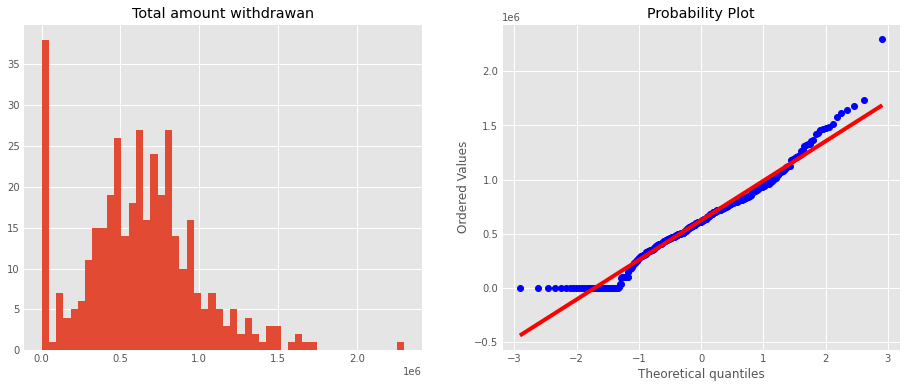

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
data['total_amount_withdrawn'].hist(bins=50)
plt.title('Total amount withdrawan')
plt.subplot(1,2,2)
stats.probplot(data['total_amount_withdrawn'], plot=plt);
data['total_amount_withdrawn'].describe().T.round()

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


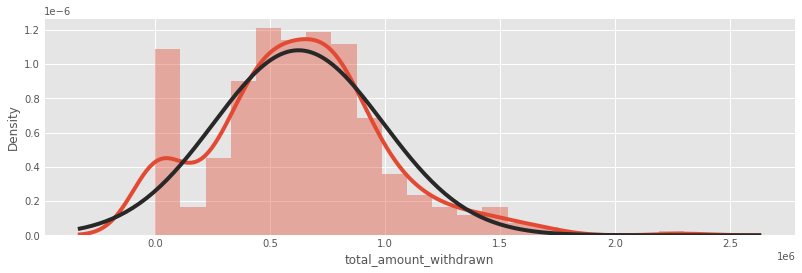

In [ ]:
from scipy import stats
fig, ax = plt.subplots(1)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sns.distplot(data['total_amount_withdrawn'],fit=stats.norm)
plt.show()

In [ ]:
!pip install ppscore
import ppscore as pps

In [ ]:
# plt.figure(figsize=(10,6))
# sns.heatmap(pps.matrix(data),annot=True,fmt=".2f")
# print('Predictive power score')
# plt.show()

In [ ]:
data.head(2)

,ATM_NAME,Weekday,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
date,,,,,,,,,
2021-01-01,SBI,FRIDAY,W,WWH,1,1,2021,1000000.0,1355000
2021-01-02,SBI,SATURDAY,H,WHH,2,1,2021,1000000.0,211500


<IPython.core.display.Javascript object>

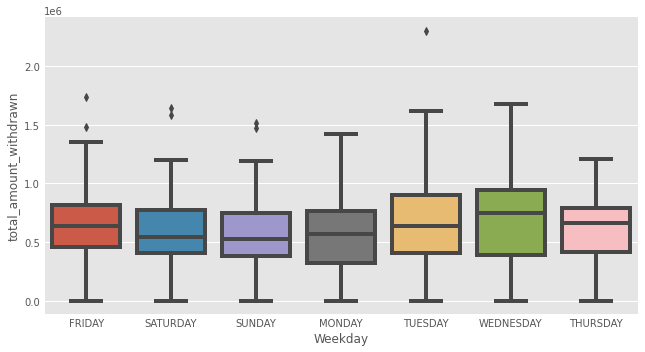

In [ ]:
#cat = ['atm_name', 'weekday', 'festival_religion', 'working_day', 'holiday_sequence']

g = sns.catplot(x='Weekday', y="total_amount_withdrawn", kind="box", data=data);
g.fig.set_size_inches(10,5)

<IPython.core.display.Javascript object>

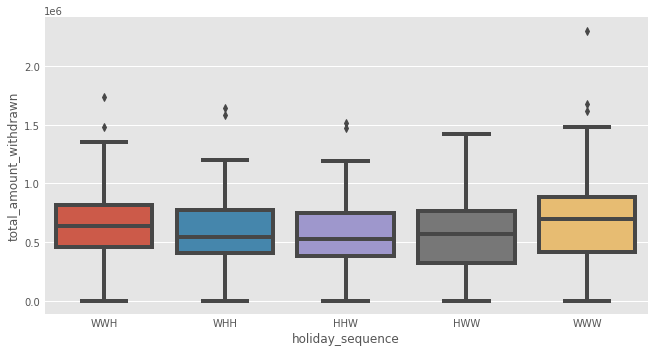

In [ ]:
g = sns.catplot(x='holiday_sequence', y="total_amount_withdrawn", kind="box", data=data);
g.fig.set_size_inches(10,5)

<IPython.core.display.Javascript object>

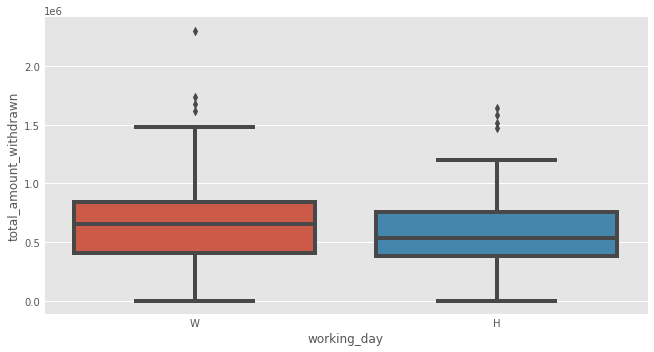

In [ ]:
g = sns.catplot(x='working_day', y="total_amount_withdrawn", kind="box", data=data);
g.fig.set_size_inches(10,5)

In [ ]:
# g = sns.catplot(x='festival_religion', y="total_amount_withdrawn", kind="box", data=data);
# g.fig.set_size_inches(10,5)

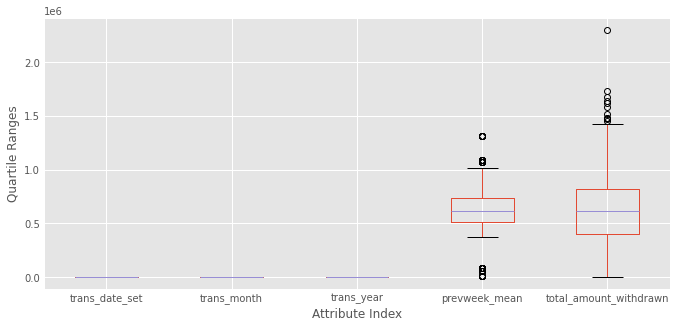

In [ ]:
plt.figure(figsize=(10,5))
boxplot = data.boxplot()
plt.xlabel("Attribute Index")
plt.ylabel(("Quartile Ranges"))
plt.show()

In [ ]:
data.tail(2)

,ATM_NAME,Weekday,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
date,,,,,,,,,
2021-01-19,SBI,WEDNESDAY,W,WWW,19,1,2021,617428.5714,671000
2021-01-20,SBI,THURSDAY,W,WWW,20,1,2021,617428.5714,777500


In [ ]:
# Copy the original data
features = data.copy()

# Select the numeric columns
numeric_subset = data[['prevweek_mean', 'total_amount_withdrawn']]

# Select the categorical columns
# dropped atm_name
categorical_subset = data[['Weekday', 'working_day',	'holiday_sequence']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 385 entries, 2021-01-01 to 2021-01-20
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   prevweek_mean           385 non-null    float64
 1   total_amount_withdrawn  385 non-null    int64  
 2   Weekday_FRIDAY          385 non-null    uint8  
 3   Weekday_MONDAY          385 non-null    uint8  
 4   Weekday_SATURDAY        385 non-null    uint8  
 5   Weekday_SUNDAY          385 non-null    uint8  
 6   Weekday_THURSDAY        385 non-null    uint8  
 7   Weekday_TUESDAY         385 non-null    uint8  
 8   Weekday_WEDNESDAY       385 non-null    uint8  
 9   working_day_H           385 non-null    uint8  
 10  working_day_W           385 non-null    uint8  
 11  holiday_sequence_HHW    385 non-null    uint8  
 12  holiday_sequence_HWW    385 non-null    uint8  
 13  holiday_sequence_WHH    385 non-null    uint8  
 14  holiday_sequence_WWH   

In [ ]:
X = features.copy().drop(columns = ['total_amount_withdrawn'])
y = features['total_amount_withdrawn'].copy()

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, shuffle= False, test_size = 0.2, random_state = 42)
print('length of Xtrain and Xtest: ', len(Xtrain), len(Xtest))
print('length of ytrain and ytest: ', len(ytrain), len(ytest))

<IPython.core.display.Javascript object>

length of Xtrain and Xtest:  308 77
length of ytrain and ytest:  308 77


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
SEED = 2020
# Fit and predict
np.random.seed(SEED)
ngb = NGBRegressor(n_estimators=400,
                   Base=default_tree_learner, Dist=Normal, Score=MLE).fit(Xtrain, ytrain)
ypred = ngb.predict(Xtest)
print('NGBoost: R2 score on testing data: {:.2f}%'.format(100 * r2_score(ytest, ypred)))

<IPython.core.display.Javascript object>

[iter 0] loss=14.3164 val_loss=0.0000 scale=1.0000 norm=314941.2338
[iter 100] loss=14.0377 val_loss=0.0000 scale=1.0000 norm=255140.6521
[iter 200] loss=13.8899 val_loss=0.0000 scale=2.0000 norm=457714.3112
[iter 300] loss=13.8061 val_loss=0.0000 scale=1.0000 norm=216931.9357
NGBoost: R2 score on testing data: -36.77%


In [ ]:
mean_ngb_test = ytest.mean()
mean_ngb_pred = ypred.mean()
print(mean_ngb_test, mean_ngb_pred)

accuracy = (mean_ngb_pred / mean_ngb_test)*100
print('accuracy:', round(accuracy,2))

586532.4675324676 663922.2823341519
accuracy: 113.19


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)

# Linear Regression


In [ ]:
linear = LinearRegression()
linear.fit(Xtrain, ytrain)

#Xtest_scaled = scaler.transform(Xtest)
# make predictions
lin_pred = linear.predict(Xtest)

In [ ]:
linpred = pd.DataFrame(lin_pred[-10:]) # predicting last 10 values
linpred.rename(columns = {0: 'lin_predicted'}, inplace=True) # renaming the column
linpred = linpred.round(decimals=0) # rounding the decimal values
d = pd.DataFrame(data['total_amount_withdrawn']).tail(10) # calling last 10 values of original amt wothdrawn
linpred.index = d.index # mapping the index of both dataframe
linok = pd.concat([linpred, d], axis=1)
linok['accuracy'] = round(linok.apply(lambda row: row.lin_predicted /
                                            row.total_amount_withdrawn *100, axis = 1),2)
linok['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in linok['accuracy']],
                                     index = linok.index)
linok = linok.assign(day_of_week = lambda x: x.index.day_name())
linok

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,lin_predicted,total_amount_withdrawn,accuracy,day_of_week
date,,,,
2021-01-11,631301.0,387000,163.13%,Monday
2021-01-12,653767.0,787500,83.02%,Tuesday
2021-01-13,541576.0,787500,68.77%,Wednesday
2021-01-14,574541.0,400000,143.64%,Thursday
2021-01-15,535827.0,752000,71.25%,Friday
2021-01-16,513193.0,528500,97.10%,Saturday
2021-01-17,563305.0,391500,143.88%,Sunday
2021-01-18,692716.0,505500,137.04%,Monday
2021-01-19,715182.0,671000,106.58%,Tuesday


In [ ]:
mean_lin_test = ytest.mean()
mean_lin_pred = lin_pred.mean()
print(mean_lin_test, mean_lin_pred)

accuracy = (mean_lin_pred / mean_lin_test)*100
print('Excess prediction: %\n', format(round(accuracy,2)))


586532.4675324676 625474.4755534007
Excess prediction: %
 106.64


# XGBoost

In [ ]:
xgb = XGBRegressor(objective = 'reg:squarederror')
xgb.fit(Xtrain, ytrain)
# make predictions
xgb_pred = xgb.predict(Xtest)

In [ ]:
xgb = XGBRegressor(objective = 'reg:squarederror')
xgb.fit(Xtrain, ytrain)
# make predictions
xgb_pred = xgb.predict(Xtest)

xgbpred = pd.DataFrame(xgb_pred[-10:])
xgbpred.rename(columns = {0: 'xgb_predicted'}, inplace=True)
xgbpred = xgbpred.round(decimals=0)
xgbpred.index = d.index
xgbok = pd.concat([xgbpred, d], axis=1)
xgbok['accuracy'] = round(xgbok.apply(lambda row: row.xgb_predicted /
                                            row.total_amount_withdrawn *100, axis = 1),2)
xgbok['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in xgbok['accuracy']],
                                     index = xgbok.index)
xgbok = xgbok.assign(day_of_week = lambda x: x.index.day_name())
xgbok

In [ ]:
xgbPred = pd.DataFrame(xgb_pred)
xgbPred.index = ytest.index
plt.plot(xgbPred, label = 'Actual withdrawal')
plt.title('XGB Model predicted cash withdrawn')
plt.figure(figsize=(20,6))
plt.show()

In [ ]:
plt.plot(ytest, label = 'Actual withdrawal', color='g')
plt.title('Actual cash withdrawn')
plt.figure(figsize=(20,6))
plt.show()

In [ ]:
xgbPred = pd.DataFrame(xgb_pred)
xgbPred.index = ytest.index
plt.plot(xgbPred, label = 'Predicted withdrawn')
plt.plot(ytest, color='g', label = 'Actual withdrawal')
plt.legend(loc='best')
plt.title('Actual vs Predicted withdrawn')
plt.show()

In [ ]:
mean_xgb_test = ytest.mean()
mean_xgb_pred = xgb_pred.mean()
print(mean_xgb_test, mean_xgb_pred)

accuracy = (mean_xgb_test / mean_xgb_pred)*100
print('accuracy:', round(accuracy,2))


In [ ]:
pip install shap

In [ ]:
import shap
shap_values = shap.TreeExplainer(xgb).shap_values(Xtest)
shap.summary_plot(shap_values, Xtest, plot_type="bar")

In [ ]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()
# j will be the record we explain
j = 1

explainerXGB = shap.TreeExplainer(xgb)
shap_values_XGB_test = explainerXGB.shap_values(Xtest)
shap.force_plot(explainerXGB.expected_value, shap_values_XGB_test[j], Xtest.iloc[[j]])

In [ ]:
# visualize the training set predictions
# load JS visualization code to notebook
shap.initjs()
shap.force_plot(explainerXGB.expected_value, shap_values, Xtest)